## Customer Churn Analysis and Prediction

In [23]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [24]:
# Load the dataset
path='../data/Telco_Customer_Churn_Dataset.csv'
dataframe=pd.read_csv(path)

### Tasks 1: Data Preparation

In [25]:
# Drop rows where the target variable 'Churn' is missing
df=dataframe.dropna(axis=0, subset=['Churn'])

# Convert target column from 'Yes'/'No' to 1/0
df['Churn']=df['Churn'].map({'Yes':1, 'No':0})

# Define target
y=df['Churn']

# Features to keep (excluding leakage columns)
features=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'Contract', 'tenure']
X=df[features]

# Identify categorical and numerical columns
categorical_cols=[col for col in X.columns if X[col].nunique()<10 and X[col].dtype =='object']
numerical_cols=[col for col in X.columns if X[col].dtype in ['int64', 'float64']]

# Preprocessing for numerical data: replace missing values with the most frequent value
num_transfomer=SimpleImputer(strategy='most_frequent')

# Preprocessing for categorical data: impute missing values and apply one-hot encoding
cat_transformer=Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps into a single transformer
preprocessor=ColumnTransformer(
    transformers=[
        ('num', num_transfomer, numerical_cols),
        ('cat', cat_transformer, categorical_cols)
    ]
)

### Tasks 2: Split Data for Training and Testing:

In [26]:
# Split into training and validation sets
X_train_full, X_valid_full, y_train, y_valid=train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Select columns to use in training and validation sets
my_cols = numerical_cols + categorical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()


### Tasks 3: Feature Selection

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# Load the dataset
dataframe2 = pd.read_csv(path)
dataframe2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [29]:

# Delete lines where the target variable 'Churn' is missing
df = dataframe2.dropna(axis=0, subset=['Churn'])

# Convert the target column from 'Yes'/'No' to binary values ​​1 and 0
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Define the target variable and feature columns
y = df['Churn']

# List of features that might influence churn prediction
features = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'Contract',           
    'MonthlyCharges',    
    'tenure'             
]
X = df[features]


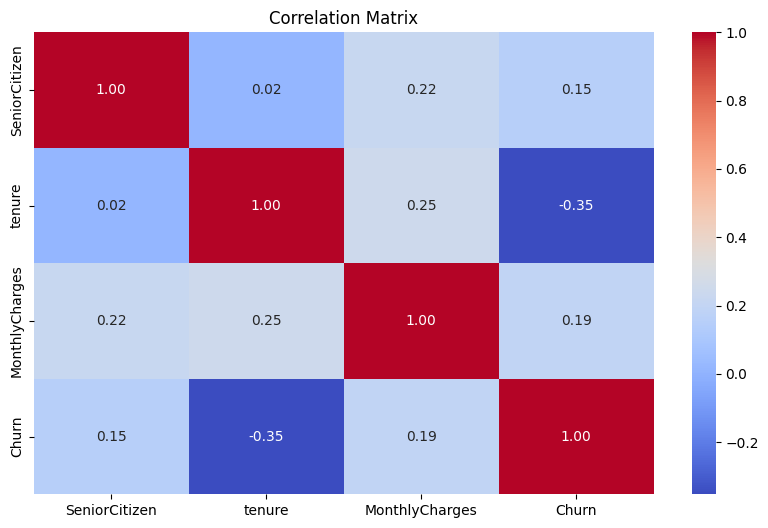

In [30]:
# Create a correlation matrix using only numerical columns
# Select only numeric columns
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()

# Create the correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Plot the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Data types before encoding:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Data types after encoding:
customerID            int64
gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService       int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSu

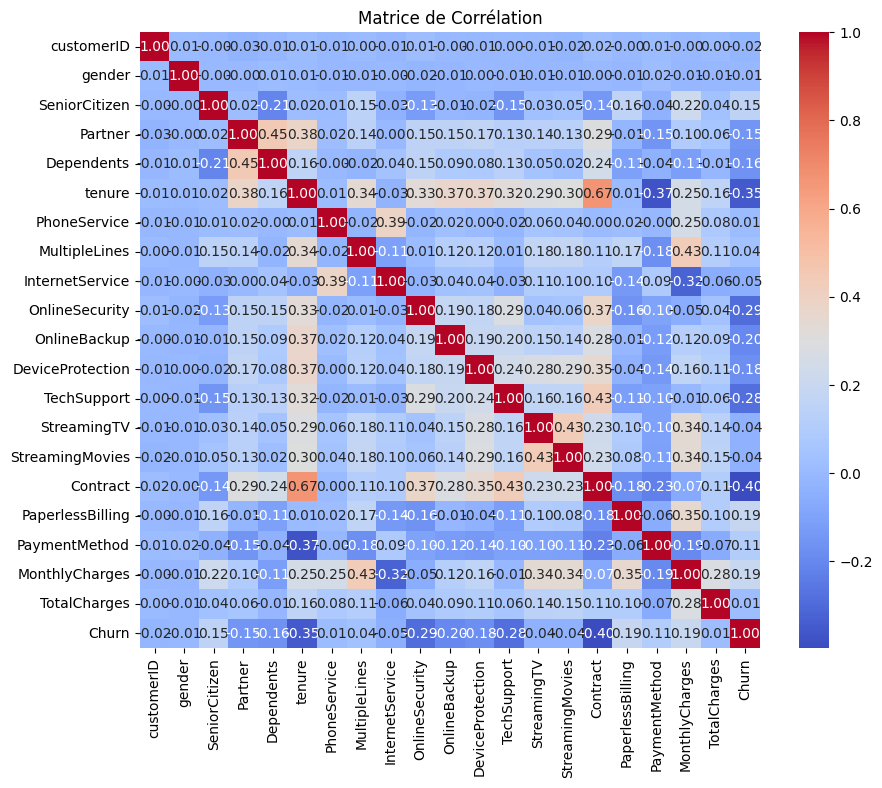

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv(path)

# Show data types to identify non-numeric columns
print("Data types before encoding:")
print(data.dtypes)

# Encode categorical columns
for column in data.select_dtypes(include=['object']).columns:
    label_encoder = LabelEncoder()
    data[column] = label_encoder.fit_transform(data[column])

# Check data types after encoding
print("\nData types after encoding:")
print(data.dtypes)

# Select only numeric columns
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Check if there are any remaining non-numeric columns
print("\nColonnes numériques :")
print(numeric_data.columns)

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Show correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de Corrélation')
plt.show()


### Tasks 4: Model Selection

### Tasks 5: Model Training

In [32]:
# Initialize a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])
my_pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='most_frequent'),
                                                  ['SeniorCitizen', 'tenure']),
                                                 ('cat',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'Contract'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [33]:
preds = my_pipeline.predict(X_valid)

# Evaluation
score = accuracy_score(y_valid, preds)
print('Accuracy:', score)


Accuracy: 0.752306600425834


### Tasks 6: Model Evaluation

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_valid, preds)

# Calculate precision
precision = precision_score(y_valid, preds)

# Calculate recall
recall = recall_score(y_valid, preds)

# Calculate F1-score
f1 = f1_score(y_valid, preds)

# Calculate ROC-AUC
# For ROC-AUC, you need the probabilities of the positive class
y_probs = my_pipeline.predict_proba(X_valid)[:, 1]  # Get probabilities for the positive class
roc_auc = roc_auc_score(y_valid, y_probs)

# Confusion Matrix
conf_matrix = confusion_matrix(y_valid, preds)

# Print the evaluation metrics
print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


Model Evaluation Metrics:
Accuracy: 0.75
Precision: 0.52
Recall: 0.54
F1-Score: 0.53
ROC-AUC: 0.77
Confusion Matrix:
[[860 181]
 [168 200]]
